<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [ ]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

In [ ]:
# unzip the file using python zipfile module
import zipfile
with zipfile.ZipFile('concrete_data_week4.zip', 'r') as zip_ref:
    zip_ref.extractall()

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [9]:
# import libraries
import tensorflow as tf
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [10]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [11]:
num_classes = 2
image_resize = 224
batch_size_training = 100
batch_size_validation = 100

In [12]:
# setup data generators
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input)

# setup training data
train_generator = data_generator.flow_from_directory(
    'concrete_data_week4/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

# setup validation data
validation_generator = data_generator.flow_from_directory(
    'concrete_data_week4/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

# setup test data
test_generator = data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical',
    shuffle=False)


Found 30001 images belonging to 2 classes.
Found 9501 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
# setup VGG16 model
model = Sequential()
model.add(VGG16(include_top=False,pooling='avg',weights='imagenet'))
model.add(Dense(num_classes, activation='softmax'))

In [19]:
model.layers[0].trainable = False
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [20]:
# define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4)
# compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# define steps_per_epoch and validation_steps
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

In [22]:
# train the model with fit_generator
train_history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=validation_steps)

Epoch 1/2
301/301 [==============================] - 101s 282ms/step - loss: 0.2261 - accuracy: 0.9178 - val_loss: 0.0641 - val_accuracy: 0.9891
Epoch 2/2
301/301 [==============================] - 119s 397ms/step - loss: 0.0480 - accuracy: 0.9917 - val_loss: 0.0351 - val_accuracy: 0.9937


In [23]:
# save the model
model.save('concrete_model_vgg.h5')

<a id="item43"></a>

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [24]:
# load pre-trained resnet50 model
concrete_res = tf.keras.models.load_model('concrete_model_resnet.h5')
# load pre-trained vgg16 model
concrete_vgg = tf.keras.models.load_model('concrete_model_vgg.h5')

In [25]:
# evaluate the model using evaluate_generator
result_res = concrete_res.evaluate(test_generator)
result_vgg = concrete_vgg.evaluate(test_generator)

# print the results
print('Resnet: loss: {}, accuracy: {}'.format(result_res[0], result_res[1]))
print('VGG: loss: {}, accuracy: {}'.format(result_vgg[0], result_vgg[1]))

5/5 [==============================] - 2s 328ms/step - loss: 0.0317 - accuracy: 0.9980
Resnet: loss: 0.004934837110340595, accuracy: 1.0
VGG: loss: 0.03174459934234619, accuracy: 0.9980000257492065


<a id="item44"></a>

## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [26]:
# setup prediction generator
prediction_generator = data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    batch_size=5,
    class_mode='categorical',
    seed=2)

Found 500 images belonging to 2 classes.


In [27]:
# predict the first five images
predictions = concrete_res.predict(prediction_generator)
predictions_vgg = concrete_vgg.predict(prediction_generator)

In [28]:
first_batch = prediction_generator.next()
first_batch_images = first_batch[0]
first_batch_labels = first_batch[1]
print(first_batch_labels)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


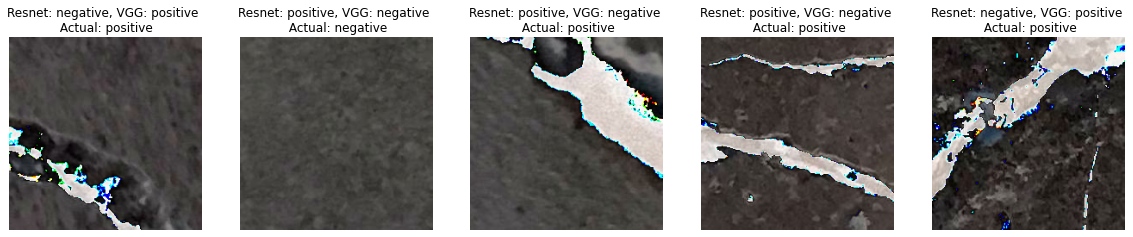

In [29]:
import matplotlib.pyplot as plt
# plot the first five images from batch 1 with their predictions and actual labels
y = ['negative', 'positive']
fig, ax = plt.subplots(1, 5, figsize=(20, 8))
for i in range(5):
    ax[i].imshow(first_batch_images[i].astype('uint8'))
    ax[i].set_title('Resnet: {}, VGG: {} \n Actual: {}'.format(
        y[np.argmax(predictions[i])],
        y[np.argmax(predictions_vgg[i])],
        y[np.argmax(first_batch_labels[i])]))
    ax[i].axis('off')

In [30]:
# report the prediction and their probabilities for the first five images
for i in range(5):
    print('Resnet: {}, Resnet probability: {}'.format(
        y[np.argmax(predictions[i])],
        predictions[i][np.argmax(predictions[i])]))
    print('VGG: {}, VGG probability: {}'.format(
        y[np.argmax(predictions_vgg[i])],
        predictions_vgg[i][np.argmax(predictions_vgg[i])]))
    print('Actual: {}'.format(y[np.argmax(first_batch_labels[i])]))
    print('\n')

Resnet: negative, Resnet probability: 0.9876345992088318
VGG: positive, VGG probability: 0.9994315505027771
Actual: positive


Resnet: positive, Resnet probability: 0.9996205568313599
VGG: negative, VGG probability: 0.9589221477508545
Actual: negative


Resnet: positive, Resnet probability: 0.9998691082000732
VGG: negative, VGG probability: 0.9831215143203735
Actual: positive


Resnet: positive, Resnet probability: 0.999573290348053
VGG: negative, VGG probability: 0.9954385161399841
Actual: positive


Resnet: negative, Resnet probability: 0.9961108565330505
VGG: positive, VGG probability: 0.9995269775390625
Actual: positive




### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).